In [27]:
import json
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import display

In [28]:
file = open("data_test.json", "r+")
channels = json.load(file)

In [34]:
# Generates an array of tuples, with each tuple taking format (CHANNEL_NAME, CHANNEL_OBJECT)
dropdownArr = [(i["name"], i) for i in channels]

# Create dropdown channel selector
chanDropdown = widgets.Dropdown(
    options=dropdownArr,
    value=dropdownArr[0][1],
    description='Channel:',
    disabled=False,
)
display(chanDropdown)

Dropdown(description='Channel:', options=(('Chroo', {'name': 'Chroo', 'id': 'UCKvJ62LDqb3uhQaqOzkkqVg', 'subCo…

In [40]:
chanChoice = chanDropdown.value
videos = pd.json_normalize(chanChoice['videos'])
videos

,name,id,uploadDateTime,duration,views,likes,commentCount
0,MAN UNITED ARE A DISGRACE!,Ud_Zb5oi720,2023-12-13T12:00:32Z,PT8M38S,17590,1021,310
1,CHELSEA NEED TO SACK POCHETTINO?,SwVhnoPcbLg,2023-12-12T12:00:21Z,PT9M24S,51342,1457,594
2,CHELSEA ARE PATHETIC! 🤬,1L5Go6Q2UpQ,2023-12-11T12:07:00Z,PT11M,99230,3216,872
3,Rory's OUTRAGEOUS Newcastle Prediction 🔮,vwusUkrfQ_I,2023-12-10T09:26:43Z,PT59S,12415,263,109
4,"DON’T PANIC, ARSENAL FANS!",l27hNjL1Qcc,2023-12-09T21:16:45Z,PT8M48S,55753,1591,410
5,ERIK TEN HAG IS FINISHED!,hAhfnMn6LxI,2023-12-09T18:20:42Z,PT8M13S,68759,1872,636
6,Can Aston Villa Win The League? 🏆,tvv76v6bFGY,2023-12-09T13:42:35Z,PT59S,18716,561,68
7,The TRUTH About Chelsea,nrGItzHlGQU,2023-12-08T12:00:47Z,PT14M13S,68280,2175,645
8,TOTTENHAM ARE FALLING APART!,S1ZdqC6L8RU,2023-12-07T22:56:00Z,PT8M14S,58110,1730,496
9,CHELSEA ARE A DISGRACE! 🤬,Ojr4R5pCsIs,2023-12-07T12:00:21Z,PT13M8S,139506,4217,1308


In [42]:
# Selector for variable to plot against
varDropdown = widgets.Dropdown(
    options=[('Views', 'views'), ('Likes', 'likes'), ('Comments', 'commentCount'), ('Duration', 'duration')],
    value='views',
    description='Variable:',
    disabled=False,
)
display(varDropdown)

Dropdown(description='Variable:', options=(('Views', 'views'), ('Likes', 'likes'), ('Comments', 'commentCount'…

In [43]:
# Extract column of videos dataframe associated with selected variable
varChoice = varDropdown.value
column = videos.loc[:,varChoice].tolist()

# Get datetimes at which vids were published - for x axis of plot
dateTimes = videos.loc[:,'uploadDateTime'].tolist()
# Datetimes are stored in JSON file as strings with ISO 8601 format. This converts them to python datetime objects
for i in range(len(dateTimes)):
    dateTimes[i] = datetime.fromisoformat(dateTimes[i])

data = pd.Series(index=dateTimes, data=column)
data = data.reindex(index=data.index[::-1]) # Flips series so items are in ascending order of datetime i.e most recent at end

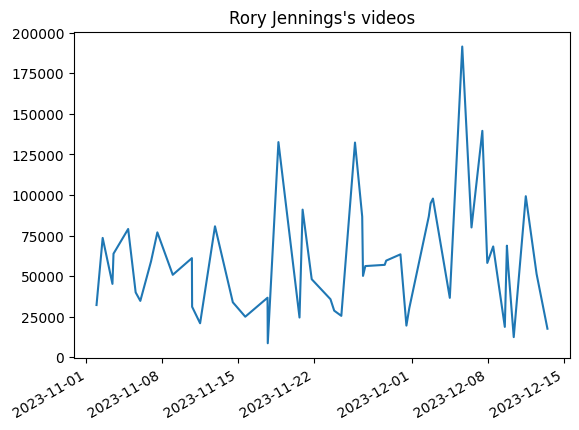

In [44]:
plot = data.plot(kind="line", title=f"{chanChoice['name']}'s videos")